# Problem Statement

In the ever-evolving financial markets, predicting stock prices remains a complex and challenging task due to the multitude of factors influencing market dynamics. Among these factors, public sentiment, particularly as expressed on social media platforms like Twitter, has emerged as a significant influencer of stock price movements. However, leveraging this vast and unst
ructured data to make accurate stock price predictions is still a nascent field, with substantial potential for innovation and impact.

This project aims to develop a Generative Adversarial Network (GAN) model to predict stock prices based on Twitter sentiment analysis. The model will focus on 24 major stocks over a span of 12 months, analyzing how public sentiment, as reflected in tweets, affects stock prices. The objective is to create a robust and reliable predictive model that can provide insights into the relationship between social media sentiment and stock market behavior, ultimately aiding investors and financial analysts in making informed decisions.

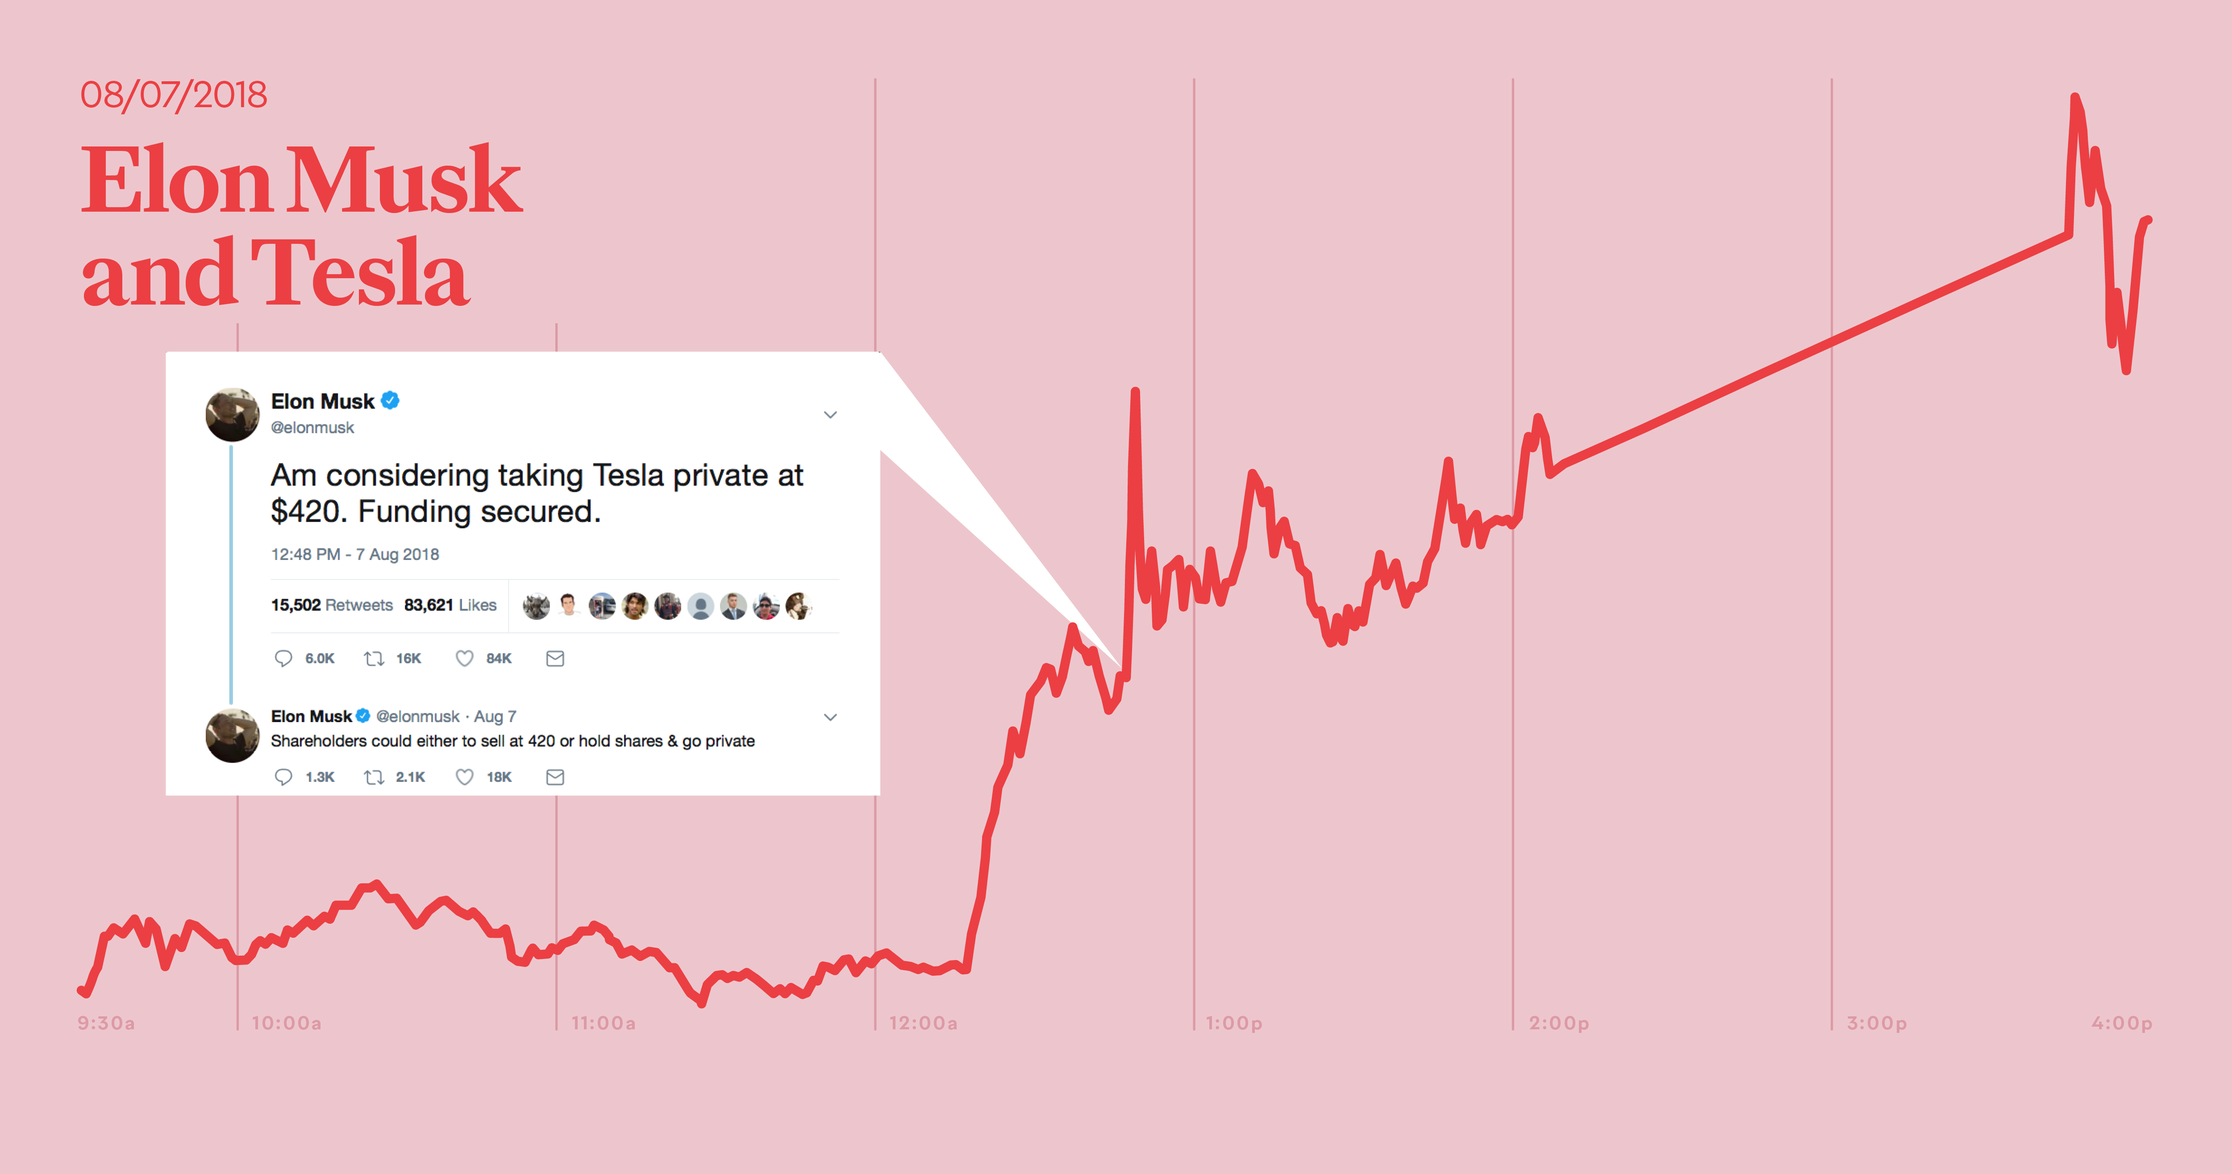

## Objectives

1. **Data Collection and Preprocessing:**
   - Gather historical stock price data for 24 major stocks over a 12-month period.
     - Collect data for `Open`, `High`, `Low`, `Close`, `Adj Close`, and `Volume`.
   - Collect Twitter sentiment data for the same stocks and period.
     - Use APIs like Alpha Vantage/Yahoo Finance for stock data and Twitter API for tweet data.
     - Perform sentiment analysis on tweets using models like VADER or BERT.
     
2. **Model Development:**
   - Develop a GAN model to predict stock prices.
     - Design the generator and discriminator components.
     - Train the GAN using the collected data.
     
3. **Visualization:**
   - Create visualizations to depict the influence of Twitter sentiment on stock prices.
     - Use libraries like Matplotlib, Seaborn, and Plotly.
   - Highlight trends and patterns over the 12-month period.
   
4. **Evaluation:**
   - Evaluate the performance of the GAN model against traditional models.
     - Use metrics such as MAE, RMSE, and R².
   - Assess the model's practical application in stock price prediction.

## Tools and Technologies

**Programming Languages**: Python

**Libraries**: TensorFlow/PyTorch (for GAN development), Scikit-learn (for traditional models), Pandas (for data manipulation), Matplotlib/Seaborn/Plotly (for visualization)

**APIs**: Alpha Vantage/Yahoo Finance (for stock data), Twitter API (for tweet data)

**NLP Tools**: VADER/BERT (for sentiment analysis)

## Background

The financial markets are influenced by a variety of factors, including economic indicators, company performance, and public sentiment. In recent years, social media platforms like Twitter have become a significant source of public sentiment data, as millions of users share their opinions and reactions to market events in real-time. Analyzing this unstructured data and integrating it with traditional financial metrics can provide a deeper understanding of market dynamics and improve stock price prediction models.

## Expected Outcomes

**Enhanced Prediction Accuracy**: Demonstrate that incorporating Twitter sentiment data improves the accuracy of stock price predictions.

**Insightful Visualizations**: Provide clear visual evidence of the relationship between public sentiment and stock price movements.

**Practical Utility**: Showcase the GAN model's potential for practical use by investors and financial analysts, helping them make more informed decisions.

## Importing packages

In [1]:
import os
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math
import time
import tensorflow as tf
from tensorflow.keras.layers import GRU, LSTM, Bidirectional, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model
from pickle import load
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
import statsmodels.api as sm
from math import sqrt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from pickle import dump
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
from faker import Faker
from prettytable import PrettyTable
import random
from collections import Counter
import re
from tabulate import tabulate
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import load_model


import warnings
warnings.filterwarnings("ignore")

In [2]:
import unicodedata
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/naina/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon is a popular tool for sentiment analysis, especially effective when working with social media text. It is designed to detect the sentiment of short texts, such as tweets, and is particularly adept at handling the nuances of social media language, including slang, emoticons, and abbreviations.

### Key Features of VADER

**Pre-trained Lexicon**:
VADER comes with a pre-trained lexicon that includes common words and phrases along with their associated sentiment scores. Each term in the lexicon is assigned a sentiment intensity score that ranges from -4 (most negative) to +4 (most positive).

**Rule-based Analysis**:
VADER uses a combination of a sentiment lexicon and grammatical and syntactical rules to calculate sentiment. It takes into account:

**Punctuation**: Exclamation points increase the intensity of the sentiment.

**Capitalization**: Words in all caps are considered more intense.

**Degree Modifiers**: Words like "very" or "extremely" can amplify the sentiment.

**Conjunctions**: Words like "but" can shift the sentiment.

**Social Media Specific**:
VADER is particularly suited for social media text because it understands:

**Emoticons**: Positive (:) or negative :( emoticons.

**Acronyms**: Common acronyms like "LOL" (laughing out loud).

**Slang**: Informal language often used on social media.

## Analyzing Monthly Sentiment Trends

Understanding stock price movements involves more than just historical data. Events as brief as a single online post within a day can profoundly impact market dynamics, potentially leading to significant shifts such as crashes or surges. Examples abound, from influential figures like Elon Musk's tweets to global crises like the onset of the COVID-19 pandemic or geopolitical developments such as the Russian invasion of Ukraine.

In this context, one crucial external indicator to consider is the sentiment of market participants. Analyzing the tone of textual data, particularly from social media platforms like Twitter, can provide valuable insights. This notebook focuses on leveraging sentiment analysis to gauge market sentiment through Twitter posts. By harnessing natural language processing techniques, we aim to uncover how public sentiment influences stock market behavior, thereby enhancing our ability to predict and understand market movements.

### Loading datasets

In [3]:
all_tweets = pd.read_csv('stock_tweets.csv')

In [4]:
print(all_tweets.shape)
all_tweets.head()

(80793, 4)


,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [5]:
print(all_tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80793 entries, 0 to 80792
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          80793 non-null  object
 1   Tweet         80793 non-null  object
 2   Stock Name    80793 non-null  object
 3   Company Name  80793 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB
None


### Handling missing values

In [6]:
all_tweets = all_tweets.dropna()
all_tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


### Sentiment Analysis Using VADER

In [7]:
analyzer = SentimentIntensityAnalyzer()
all_tweets['sentiment'] = all_tweets['Tweet'].apply(lambda tweet: analyzer.polarity_scores(tweet)['compound'])

In [8]:
all_tweets.head()

,Date,Tweet,Stock Name,Company Name,sentiment
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750


In [9]:
all_tweets['daily_sentiment'] = all_tweets.groupby('Date')['sentiment'].transform('mean')

In [10]:
all_tweets.head()

,Date,Tweet,Stock Name,Company Name,sentiment,daily_sentiment
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.0772
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,0.0000
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,0.2960
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,-0.7568
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,-0.8750


In [11]:
all_stocks = pd.read_csv('stock_yfinance_data.csv')
print(all_stocks.shape)
all_stocks.head()

(6300, 8)


,Date,Open,High,Low,Close,Adj Close,Volume,Stock Name
0,2021-09-30,260.333344,263.043335,258.333344,258.493347,258.493347,53868000,TSLA
1,2021-10-01,259.466675,260.260010,254.529999,258.406677,258.406677,51094200,TSLA
2,2021-10-04,265.500000,268.989990,258.706665,260.510010,260.510010,91449900,TSLA
3,2021-10-05,261.600006,265.769989,258.066681,260.196655,260.196655,55297800,TSLA
4,2021-10-06,258.733337,262.220001,257.739990,260.916656,260.916656,43898400,TSLA


### Stock names

In [12]:
unique_stocks = all_stocks["Stock Name"].unique()
table = PrettyTable()
table.field_names = ["Unique Stock Names"]

for stock in unique_stocks:
    table.add_row([stock])

print(table)

+--------------------+
| Unique Stock Names |
+--------------------+
|        TSLA        |
|        MSFT        |
|         PG         |
|        META        |
|        AMZN        |
|        GOOG        |
|        AMD         |
|        AAPL        |
|        NFLX        |
|        TSM         |
|         KO         |
|         F          |
|        COST        |
|        DIS         |
|         VZ         |
|        CRM         |
|        INTC        |
|         BA         |
|         BX         |
|        NOC         |
|        PYPL        |
|        ENPH        |
|        NIO         |
|         ZS         |
|        XPEV        |
+--------------------+


### Data Range

In [13]:
all_tweets['Date'] = pd.to_datetime(all_tweets['Date']).dt.tz_localize(None)
unique_dates = all_tweets['Date'].dt.date.unique()
print("Date Range of tweets: {} to {}".format(min(unique_dates), max(unique_dates)))

Date Range of tweets: 2021-09-30 to 2022-09-29


In [14]:
all_stocks['Date'] = pd.to_datetime(all_stocks['Date']).dt.tz_localize(None)
unique_dates_of_stocks = all_stocks['Date'].dt.date.unique()
print("Stocks dating from {} to {}".format(min(unique_dates_of_stocks), max(unique_dates_of_stocks)))

Stocks dating from 2021-09-30 to 2022-09-29


### Merging the Datasets

In [15]:
merged_df = pd.merge(all_tweets, all_stocks, on=['Date', 'Stock Name'])
merged_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment,daily_sentiment,Open,High,Low,Close,Adj Close,Volume
0,2022-08-30,@fraggelcurris @latestinspace @elonmusk @Tesla...,TSLA,"Tesla, Inc.",-0.7178,-0.7178,287.869995,288.480011,272.649994,277.700012,277.700012,50541800
1,2021-12-16,FREE #OPTIONS Ideas 🤯\n\nScale out when above ...,TSLA,"Tesla, Inc.",0.9035,0.9035,331.500000,331.660004,307.283325,308.973328,308.973328,82771500
2,2021-10-25,What stocks are you watching this week? Beside...,TSLA,"Tesla, Inc.",0.0000,0.0000,316.843323,348.339996,314.733337,341.619995,341.619995,188556300
3,2021-10-18,Elite Options Watchlist 💡\n\n📈 $AMZN 3500C ove...,TSLA,"Tesla, Inc.",0.0000,0.0000,283.929993,291.753326,283.823334,290.036682,290.036682,72621600
4,2022-02-09,Win It Wednesday Triggers 🎯\n\n🌎 $GOOGL 2900c ...,MSFT,Microsoft Corporation,0.7783,0.7783,309.869995,311.929993,307.390015,311.209991,308.320984,31284700


### Correlation Analysis 

In [16]:
correlation = merged_df[['sentiment', 'Open', 'Close', 'Adj Close']].corr()
print(correlation)

           sentiment      Open     Close  Adj Close
sentiment   1.000000  0.158389  0.143581   0.143156
Open        0.158389  1.000000  0.995191   0.995080
Close       0.143581  0.995191  1.000000   0.999883
Adj Close   0.143156  0.995080  0.999883   1.000000


It shows the relationship between different variables of the dataset.
Correlation values range from -1 to 1, where:

**1** indicates a ***perfect positive correlation*** (as one variable increases, the other increases).

**-1** indicates a ***perfect negative correlation*** (as one variable increases, the other decreases).

**0** indicates ***no correlation***.

1. **`Open`** is positively correlated with **`Close`** (0.995191) and **`Adj Close`** (0.995080), indicating that as the open price increases, the close and adjusted close prices tend to increase as well.
2. **`Close`** and **`Adj Close`** are nearly perfectly correlated (0.999883), meaning they move almost identically.
3. **`sentiment`** has low positive correlations with the stock prices (**`Open`**, **`Close`**, **`Adj Close`**), suggesting



### Lag Analysis

Shifting stock prices to see the impact of sentiment on the next day's prices

In [17]:
merged_df['Next_Day_Close'] = merged_df['Close'].shift(-1)

Calculating correlation between sentiment and next day's close

In [18]:
lag_correlation = merged_df[['sentiment', 'Next_Day_Close']].corr()
print(lag_correlation)

                sentiment  Next_Day_Close
sentiment        1.000000       -0.248829
Next_Day_Close  -0.248829        1.000000


Next_Day_Close has a ***negative correlation*** of -0.248829 with sentiment. This suggests that as the sentiment or daily sentiment increases, the next day's closing price tends to decrease slightly. However, the correlation is relatively weak, so while there is some inverse relationship, it's not very strong.

This matrix suggests that while **sentiment has some influence on the next day's closing price, the effect is not strong and is actually slightly negative**. This could imply that higher positive sentiment might lead to a slight decrease in the stock's next-day closing price, but the relationship is weak and should be interpreted with caution.

### Sentiment Impact on Volatility

Calculating daily price range as a measure of volatility

In [19]:
merged_df['Volatility'] = merged_df['High'] - merged_df['Low']

Analyzing the impact of sentiment on volatility

In [20]:
volatility_correlation = merged_df[['sentiment', 'Volatility']].corr()
print(volatility_correlation)

            sentiment  Volatility
sentiment    1.000000    0.022246
Volatility   0.022246    1.000000


Volatility has a **very low positive correlation with sentiment** (0.022246). This suggests that there is a very slight positive relationship between sentiment and volatility, meaning that as sentiment increases, volatility might increase just a tiny bit. However, the correlation is so close to zero that this relationship is essentially negligible.

In summary, **sentiment appear to have almost no relationship with volatility** based on this correlation matrix. The impact of sentiment on volatility is minimal and not statistically significant.

### Volume Analysis

Analysing sentiment on trading volume

In [21]:
volume_correlation = merged_df[['sentiment', 'Volume']].corr()
print(volume_correlation)

           sentiment    Volume
sentiment   1.000000 -0.222861
Volume     -0.222861  1.000000


Sentiment has a **weak negative correlation with Volume** (-0.222861). This suggests that as sentiment increases, the trading volume tends to decrease slightly. However, the relationship is weak, meaning that sentiment doesn't strongly influence trading volume.

### Sentiment Analysis - Stock Wise

#### Sentiment analysis of tweets

In [22]:
all_tweets = all_tweets.copy()
all_tweets["sentiment_score"] = ''
all_tweets["Negative"] = ''
all_tweets["Neutral"] = ''
all_tweets["Positive"] = ''
all_tweets.head()

,Date,Tweet,Stock Name,Company Name,sentiment,daily_sentiment,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",0.0772,0.0772,,,,
1,2022-09-29 23:24:43,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",0.0000,0.0000,,,,
2,2022-09-29 23:18:08,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",0.2960,0.2960,,,,
3,2022-09-29 22:40:07,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",-0.7568,-0.7568,,,,
4,2022-09-29 22:27:05,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",-0.8750,-0.8750,,,,


In [23]:
sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in all_tweets.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', all_tweets.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        all_tweets.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        all_tweets.at[indx, 'Negative'] = sentence_sentiment['neg']
        all_tweets.at[indx, 'Neutral'] = sentence_sentiment['neu']
        all_tweets.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (all_tweets.loc[indexx, 'Tweet'])
        print (indx)
        break

# Display updated DataFrame
print("Updated DataFrame:")
print(all_tweets.head())

Updated DataFrame:
                 Date                                              Tweet  \
0 2022-09-29 23:41:16  Mainstream media has done an amazing job at br...   
1 2022-09-29 23:24:43  Tesla delivery estimates are at around 364k fr...   
2 2022-09-29 23:18:08  3/ Even if I include 63.0M unvested RSUs as of...   
3 2022-09-29 22:40:07  @RealDanODowd @WholeMarsBlog @Tesla Hahaha why...   
4 2022-09-29 22:27:05  @RealDanODowd @Tesla Stop trying to kill kids,...   

  Stock Name Company Name  sentiment  daily_sentiment sentiment_score  \
0       TSLA  Tesla, Inc.     0.0772           0.0772          0.0772   
1       TSLA  Tesla, Inc.     0.0000           0.0000             0.0   
2       TSLA  Tesla, Inc.     0.2960           0.2960           0.296   
3       TSLA  Tesla, Inc.    -0.7568          -0.7568         -0.7568   
4       TSLA  Tesla, Inc.    -0.8750          -0.8750          -0.875   

  Negative Neutral Positive  
0    0.127   0.758    0.115  
1      0.0     1.0      0

Aggregating sentiment scores by 'Stock Name'

In [24]:
sentiment_by_stock = all_tweets.groupby('Stock Name')[['Negative', 'Neutral', 'Positive']].sum()

print("Sentiment by Stock:")
print(sentiment_by_stock)

Sentiment by Stock:
            Negative    Neutral  Positive
Stock Name                               
AAPL         203.913   4463.926   388.181
AMD           66.705    1927.13   233.169
AMZN          164.48    3542.98   381.532
BA              9.88    361.243    27.881
BX             0.623     44.959     4.417
COST          12.925    348.745    31.339
CRM            4.421    212.308     16.27
DIS            23.86     563.19     47.95
ENPH           6.855    186.867    22.275
F              1.979     26.562      2.46
GOOG           47.52   1125.842   117.638
INTC          12.363    275.379    27.256
KO             6.049      282.9    21.051
META         124.676    2397.03   229.298
MSFT          164.48    3542.98   381.532
NFLX          96.225   1493.106   137.678
NIO           69.144   2647.053   304.794
NOC            1.979     26.562      2.46
PG            164.48    3542.98   381.532
PYPL          29.789    740.916    72.293
TSLA        1762.633  31851.718  3807.612
TSM          5

### Best Performing Stock based on tweets sentiment

**TSLA (Tesla)**

Positive Sentiment: 3807.612  

Analysis: Tesla has the highest positive sentiment among all the stocks listed. This suggests that the sentiment towards Tesla is the most favorable compared to other stocks, indicating strong positive perception and possibly positive market sentiment.

### Worst Performing Stock based on tweets sentiment 

**AAPL (Apple)**  

Negative Sentiment: 203.913  

Analysis: Apple has the highest negative sentiment among the stocks listed. This indicates that there is significant negative sentiment towards Apple compared to other stocks, which could imply concerns or negative perceptions in the market about the company.

### Sentiment analysis - Company wise

Grouping by 'Company Name' and summing the sentiment columns

In [25]:
sentiment_by_company = all_tweets.groupby('Company Name')[['Negative', 'Neutral', 'Positive']].sum()

In [26]:
print("Sentiment by Company:")
print(sentiment_by_company)

Sentiment by Company:
                                                    Negative    Neutral  \
Company Name                                                              
Advanced Micro Devices, Inc.                          66.705    1927.13   
Alphabet Inc.                                          47.52   1125.842   
Amazon.com, Inc.                                      164.48    3542.98   
Apple Inc.                                           203.913   4463.926   
Blackstone Inc.                                        0.623     44.959   
Costco Wholesale Corporation                          12.925    348.745   
Enphase Energy, Inc.                                   6.855    186.867   
Ford Motor Company                                     1.979     26.562   
Intel Corporation                                     12.363    275.379   
Meta Platforms, Inc.                                 124.676    2397.03   
Microsoft Corporation                                 164.48    3542.98   
NIO

### Best Performing Company

**Tesla, Inc.**  

Positive Sentiment: 3807.612  
Negative Sentiment: 1762.633  

Analysis: Tesla has the highest positive sentiment, significantly outpacing all other companies. This suggests strong investor confidence and favorable perception of Tesla in the market. The high positive sentiment indicates a general optimism about Tesla’s future prospects.

### Worst Performing Company

**Taiwan Semiconductor Manufacturing Company Limited (TSMC)**. 

Negative Sentiment: 599.951  
Positive Sentiment: 1603.298  

Analysis: TSMC has the highest negative sentiment after Tesla, but since Tesla is already identified as the best performing, TSMC stands out as the worst performing in terms of the sentiment balance. Although it has substantial positive sentiment, the high negative sentiment indicates mixed feelings or significant concerns about the company’s future among investors.


## Historical price data for the analysed stock ticker

Function to print yearly Close price of the user specified stock

In [27]:
def plot_yearly_stock_graph(all_stocks, stock_name):
    stock_data = all_stocks[all_stocks['Stock Name'] == stock_name]

    fig, ax = plt.subplots(figsize=(15, 8))
    ax.plot(stock_data.index, stock_data['Close'], color='#008B8B', marker='o', linestyle='-', linewidth=1, markersize=3)
    ax.set(xlabel="Date", ylabel="Close Price (USD)", 
           title=f"{stock_name} Daily Close Price")
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Function to print monthly Close price of the user specified stock

In [28]:
def plot_monthly_stock_graph(all_stocks, stock_name, year, month):
    try:
        all_stocks.index = pd.to_datetime(all_stocks.index)

        data = all_stocks[(all_stocks['Stock Name'] == stock_name) & 
                        (all_stocks.index.year == year) & 
                        (all_stocks.index.month == month)]

        if data.empty:
            print(f"No data available for {stock_name} in {year}-{month}.")
            return

        # Plotting
        fig, ax = plt.subplots(figsize=(15, 8))

        ax.plot(data.index, data['Close'], color='#FF6347')
        ax.set(xlabel="Time", ylabel="USD", 
               title=f"{stock_name} Stock Price in {year}-{month}")

        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except ValueError:
        print("Invalid input. Please enter valid year and month.")


Function to print weekly Close price of the user specified stock

In [29]:
def plot_weekly_stock_price(all_stocks, stock_name, year, month, day):
    try:
        all_stocks.index = pd.to_datetime(all_stocks.index)
        year = int(year)
        month = int(month)
        day = int(day)
        

        start_date = pd.Timestamp(year=year, month=month, day=day) - pd.Timedelta(days=5)
        end_date = pd.Timestamp(year=year, month=month, day=day) + pd.Timedelta(days=5)
        

        data = all_stocks[(all_stocks['Stock Name'] == stock_name) &
                        (all_stocks.index >= start_date) &
                        (all_stocks.index <= end_date)]

        if data.empty:
            print(f"No data available for {stock_name} around {year}-{month}-{day}.")
        else:
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.plot(data.index, data['Close'], marker='o', linestyle='-', color='b', label='Close Price')
            ax.set(xlabel='Date', ylabel='Closing Price (USD)', title=f'{stock_name} Stock Price around {year}-{month}-{day}')
            ax.grid(True)
            ax.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    except ValueError:
        print("Invalid input. Please enter valid numeric values for year, month, and day.")


A main function to call all these functions to get the user's input

Choose an option:
1. Plot daily stock data
2. Plot monthly stock data
3. Plot yearly stock data
Enter your choice (1/2/3): 3
Enter the stock name: TSLA


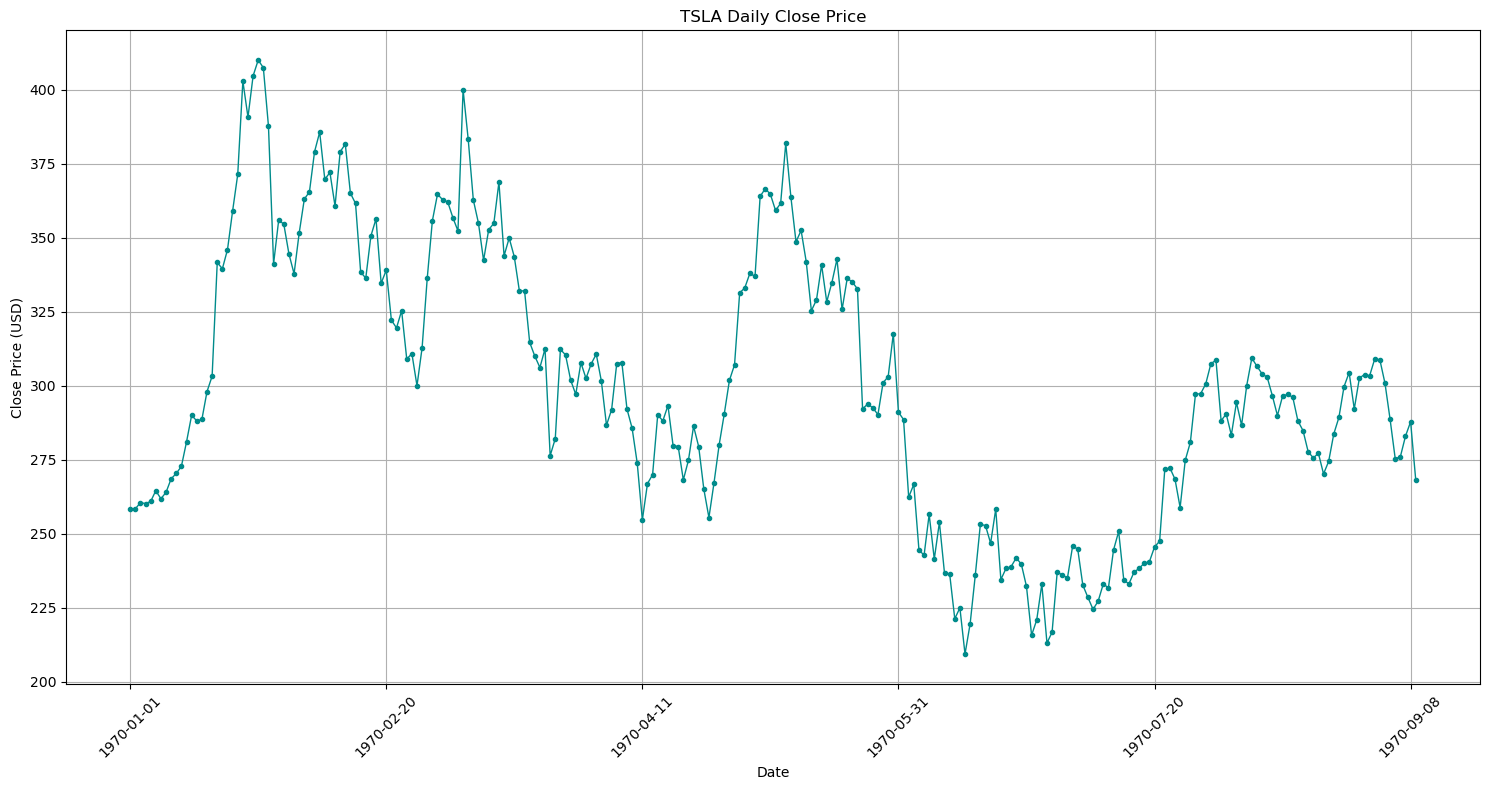

In [30]:
def main():
    print("Choose an option:")
    print("1. Plot daily stock data")
    print("2. Plot monthly stock data")
    print("3. Plot yearly stock data")
    choice = input("Enter your choice (1/2/3): ")

    if choice == '1':
        stock_name = input("Enter the stock name: ")
        year = input("Enter the year (YYYY): ")
        month = input("Enter the month (MM): ")
        day = input("Enter the day (DD): ")
        plot_weekly_stock_price(all_stocks, stock_name, year, month, day)

    elif choice == '2':
        stock_name = input("Enter the stock name: ")
        year = input("Enter the year (YYYY): ")
        month = input("Enter the month (MM): ")
        plot_monthly_stock_graph(all_stocks, stock_name, int(year), int(month))

    elif choice == '3':
        stock_name = input("Enter the stock name: ")
        plot_yearly_stock_graph(all_stocks, stock_name)

    else:
        print("Invalid choice. Please enter a valid option (1/2/3).")

if __name__ == "__main__":
    main()

### Seasonal Decomposition

 This function decomposes a time series into three components: trend, seasonal, and residual (or noise).

In an additive model, the time series is assumed to be the sum of the trend, seasonal, and residual components (Y[t] = T[t] + S[t] + R[t]). This is appropriate when the seasonal fluctuations and trend remain roughly constant over time.

The frequency of the seasonal component, meaning it expects a weekly seasonal pattern (e.g., daily data with a repeating pattern every 7 days).

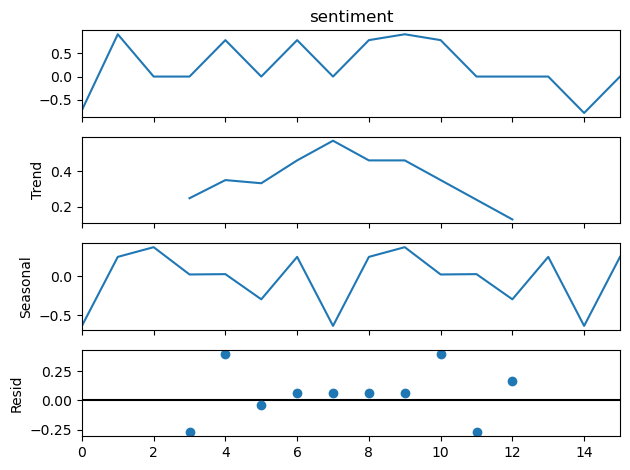

In [31]:
result = seasonal_decompose(merged_df['sentiment'], model='additive', period=7)
result.plot()
plt.show()

**Sentiment Graph:**

This graph shows the original time series data for the "sentiment" variable.
It represents the raw values of the sentiment metric over the given time period.
This graph provides the starting point for the time series analysis, showing the overall pattern and fluctuations in the sentiment data.


**Trend Graph:**

The trend graph depicts the long-term, underlying direction of the sentiment data.
It captures the general upward, downward, or flat movement of the sentiment over time, excluding the seasonal and irregular components.
In this case, the trend line appears to be decreasing, suggesting an overall declining trend in the sentiment metric.


**Seasonal Graph:**

This graph illustrates the repeating, periodic pattern observed in the sentiment data.
The seasonal component fluctuates above and below the zero line, indicating the deviations from the overall trend at each time point.
The regular, cyclical nature of this plot suggests that the sentiment data has a consistent weekly (7-day) seasonal pattern.
This means the sentiment tends to rise and fall in a predictable, recurring manner on a weekly basis.  

**Residual Graph:**

The residual graph represents the remaining variation in the sentiment data that is not explained by the trend and seasonal components.
It shows the irregular, unpredictable fluctuations or "noise" in the time series that cannot be attributed to the systematic trend and seasonal patterns.
Analyzing the residual plot can help identify any remaining patterns, anomalies, or unexplained factors in the sentiment data that may require further investigation.

### Sector Comparison

In [32]:
grouped = merged_df.groupby('Stock Name').agg({
    'sentiment': 'mean',
    'daily_sentiment': 'mean',
    'Close': 'mean'
}).reset_index()

print(grouped)

  Stock Name  sentiment  daily_sentiment       Close
0       AAPL  -0.389150        -0.389150  135.510002
1        AMD   0.000000         0.000000  121.470001
2       AMZN   0.389150         0.389150  166.763252
3       COST   0.000000         0.000000  452.250000
4       META   0.840900         0.840900  283.449997
5       MSFT   0.389150         0.389150  309.250000
6         PG   0.389150         0.389150  150.970001
7       TSLA   0.046425         0.046425  304.582504


**Most Positive Sentiment: Meta (META)** stands out with the highest positive sentiment, which might be a result of favorable news or investor optimism.  

**Most Negative Sentiment: Apple (AAPL)** has the lowest sentiment score, indicating potential concerns or negative sentiment in the market.  

**Market Reactions**: Comparing sentiment with the closing prices could help assess whether the sentiment is aligned with the stock's performance. For example, a high positive sentiment with a high closing price (like META) might indicate that the market is reflecting that sentiment in the stock's value.  

**Neutral Sentiments: AMD and Costco’s** neutral sentiment suggests stable perceptions, which could indicate steady performance without any significant recent developments.


### Top performers and Underperformers 

In [33]:
top_performers = merged_df[merged_df['Close'] > merged_df['Open']]
underperformers = merged_df[merged_df['Close'] < merged_df['Open']]

top_performers = top_performers[(top_performers['sentiment'] != 0) & (top_performers['daily_sentiment'] != 0)]
underperformers = underperformers[(underperformers['sentiment'] != 0) & (underperformers['daily_sentiment'] != 0)]

print('Top Performers:')
print(top_performers[['Stock Name', 'sentiment', 'daily_sentiment']].groupby('Stock Name').mean())

print('\nUnderperformers:')
print(underperformers[['Stock Name', 'sentiment', 'daily_sentiment']].groupby('Stock Name').mean())


Top Performers:
            sentiment  daily_sentiment
Stock Name                            
META           0.7783           0.7783
MSFT           0.7783           0.7783

Underperformers:
            sentiment  daily_sentiment
Stock Name                            
AAPL         -0.77830         -0.77830
AMZN          0.77830          0.77830
META          0.90350          0.90350
PG            0.77830          0.77830
TSLA          0.09285          0.09285


**Top Performers: Meta and Microsoft** have strong positive sentiment, indicating favorable market conditions and positive performance. 

**Underperformers: Apple** shows clear negative sentiment, while **Amazon, Procter & Gamble, Meta (with higher sentiment in another context), and Tesla** demonstrate positive sentiment that did not fully translate into strong stock performance. This suggests that sentiment is a valuable but not definitive indicator of stock performance, as other market factors can influence outcomes.

### Adding Technical Indicators

To help the network understand the bigger picture of the market we add different technical indicators to the training data, such as moving averages, Bollinger bands etc., which describe the development of stock price not only for the current day, but for the past week or more.

**MA(7)** stans for **Moving Average for past 7 days**,   
whereas **MA(20)** means **Moving Average for past 20 days**.

**EMA** is **Exponential Moving average** and we can calculate it as:  

EMA_t = Pclose + (EMA_t-1 (100 - P))*  

**Bollinger Bands** are calculated as:  

**middle line: stdev(MA(20))  
upper bound: MA(20) + 2stdev(MA(20))  
lower bound: MA(20) - 2stdev(MA(20))**

In [34]:
def get_tech_ind(data):
    data['MA7'] = data.iloc[:,4].rolling(window=7).mean() 
    data['MA20'] = data.iloc[:,4].rolling(window=20).mean() 

    data['MACD'] = data.iloc[:,4].ewm(span=26).mean() - data.iloc[:,1].ewm(span=12,adjust=False).mean()

    data['20SD'] = data.iloc[:, 4].rolling(20).std()
    data['upper_band'] = data['MA20'] + (data['20SD'] * 2)
    data['lower_band'] = data['MA20'] - (data['20SD'] * 2)

    data['EMA'] = data.iloc[:,4].ewm(com=0.5).mean()


    data['logmomentum'] = np.log(data.iloc[:,4] - 1)

    return data

Taking user input of the desired stock

In [35]:
stock_name = input("Please enter the stock name: ")

Please enter the stock name: TSLA


In [36]:
tweetdata = pd.read_csv('stock_tweets.csv')

In [37]:
df = tweetdata[tweetdata['Stock Name'] == stock_name]

In [38]:
sent_df = df.copy()
sent_df["sentiment_score"] = ''
sent_df["Negative"] = ''
sent_df["Neutral"] = ''
sent_df["Positive"] = ''
sent_df.head()

,Date,Tweet,Stock Name,Company Name,sentiment_score,Negative,Neutral,Positive
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",,,,
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",,,,
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",,,,
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",,,,
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",,,,


In [39]:
sentiment_analyzer = SentimentIntensityAnalyzer()
for indx, row in sent_df.iterrows():
    try:
        sentence_i = unicodedata.normalize('NFKD', sent_df.loc[indx, 'Tweet'])
        sentence_sentiment = sentiment_analyzer.polarity_scores(sentence_i)
        sent_df.at[indx, 'sentiment_score'] = sentence_sentiment['compound']
        sent_df.at[indx, 'Negative'] = sentence_sentiment['neg']
        sent_df.at[indx, 'Neutral'] = sentence_sentiment['neu']
        sent_df.at[indx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (sent_df.loc[indexx, 'Tweet'])
        print (indx)
        break


In [40]:
sent_df['Date'] = pd.to_datetime(sent_df['Date'])
sent_df['Date'] = sent_df['Date'].dt.date
sent_df = sent_df.drop(columns=['Negative', 'Positive', 'Neutral', 'Stock Name', 'Company Name'])

In [41]:
twitter_df = sent_df.groupby(['Date'])[['sentiment_score']].mean()
print(twitter_df.shape)

(365, 1)


In [42]:
all_stocks = pd.read_csv('stock_yfinance_data.csv')

In [43]:
stock_df = all_stocks[all_stocks['Stock Name'] == stock_name]
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
stock_df['Date'] = stock_df['Date'].dt.date

In [44]:
final_df = stock_df.join(twitter_df, how="left", on="Date")
final_df = final_df.drop(columns=['Stock Name'])
print(final_df.shape)

(252, 8)


In [45]:
def tech_ind(dataset):
    fig,ax = plt.subplots(figsize=(15, 8), dpi = 200)
    x_ = range(3, dataset.shape[0])
    x_ = list(dataset.index)

    ax.plot(dataset['Date'], dataset['MA7'], label='Moving Average (7 days)', color='g', linestyle='--')
    ax.plot(dataset['Date'], dataset['Close'], label='Closing Price', color='#6A5ACD')
    ax.plot(dataset['Date'], dataset['MA20'], label='Moving Average (20 days)', color='r', linestyle='-.')
    ax.xaxis.set_major_formatter(DateFormatter("%Y"))
    plt.title('Technical indicators')
    plt.ylabel('Close (USD)')
    plt.xlabel("Year")
    plt.legend()

    plt.show()

In [46]:
tech_df = get_tech_ind(final_df)
dataset = tech_df.iloc[20:,:].reset_index(drop=True)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,sentiment_score,MA7,MA20,MACD,20SD,upper_band,lower_band,EMA,logmomentum
0,2021-10-28,356.103333,360.333344,351.399994,359.013336,359.013336,81639600,0.185287,325.127141,288.855501,-9.269895,32.580099,354.015698,223.695304,353.510805,5.880570
1,2021-10-29,360.619995,371.736664,357.736664,371.333344,371.333344,89755200,0.147279,336.946189,294.501834,-10.609662,36.566908,367.635649,221.368019,365.392497,5.914404
2,2021-11-01,381.666656,403.250000,372.886658,402.863342,402.863342,168146100,0.211411,351.926666,301.619501,-11.860446,42.906989,387.433479,215.805523,390.373061,5.996112
3,2021-11-02,386.453339,402.863342,382.000000,390.666656,390.666656,128213400,0.155453,364.418095,308.143001,-14.295169,46.078655,400.300312,215.985690,390.568791,5.965292
4,2021-11-03,392.443329,405.130005,384.206665,404.619995,404.619995,103885500,0.147228,373.418095,315.328168,-15.716662,49.410503,414.149173,216.507162,399.936260,6.000474


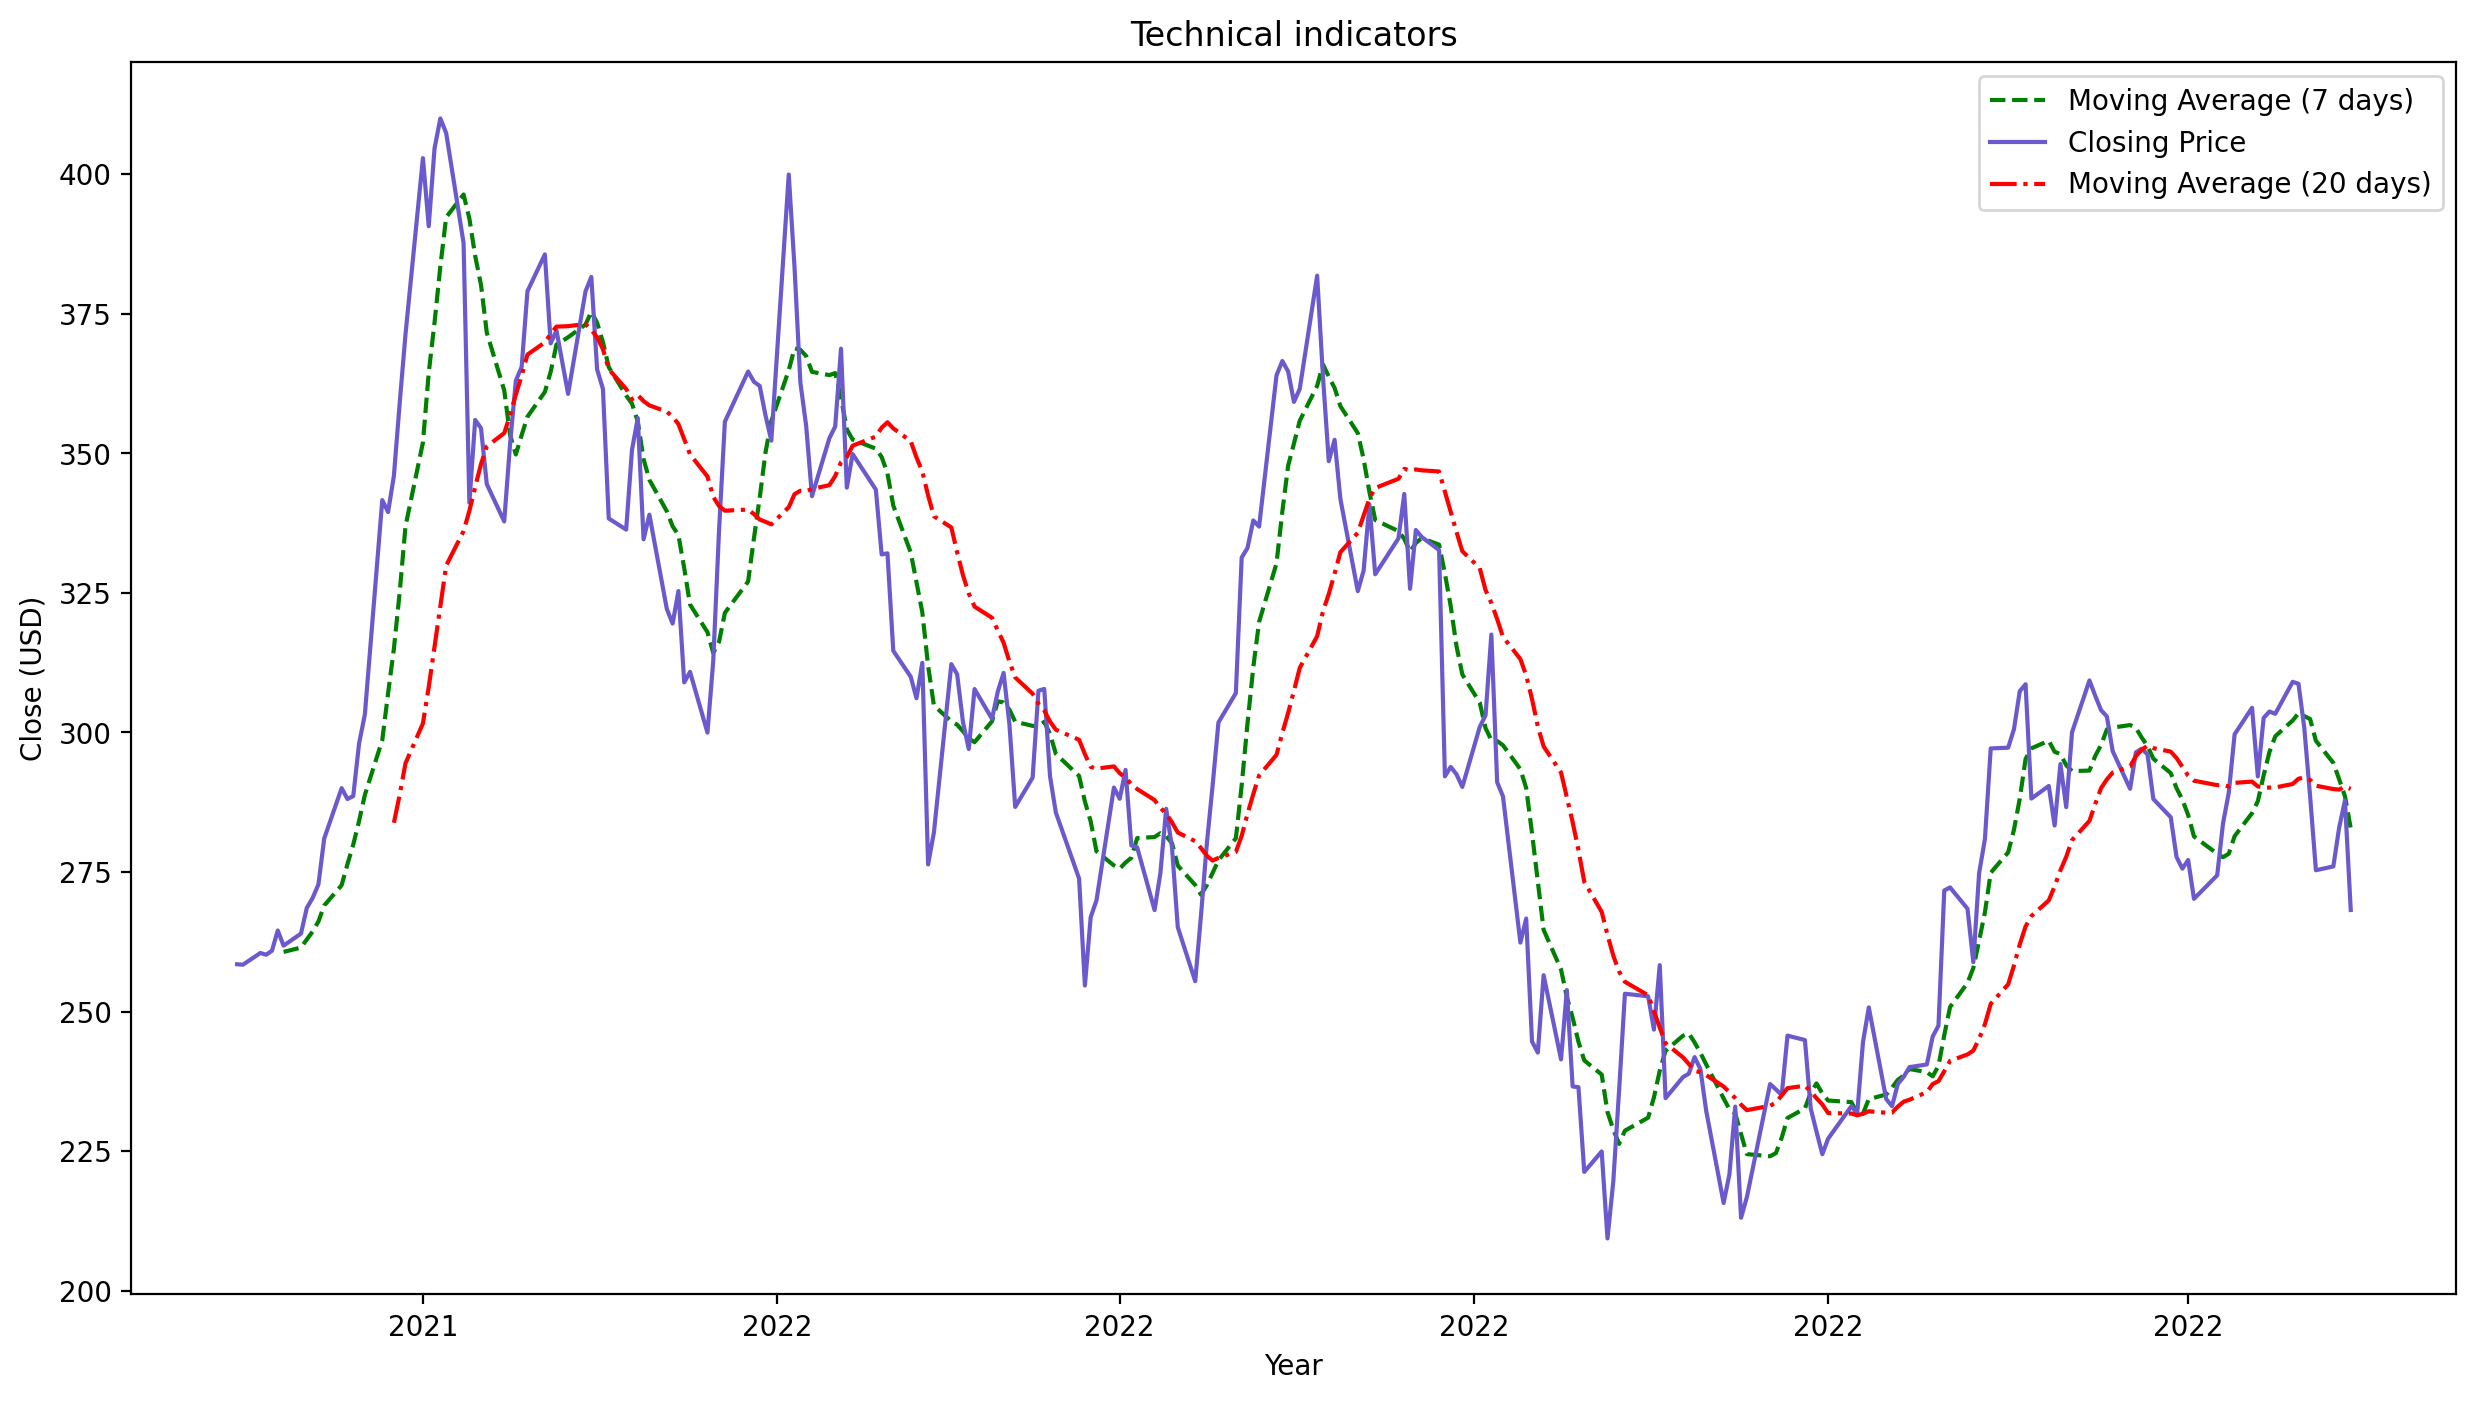

In [47]:
tech_ind(tech_df)

## Building GAN model

In this project we build a GAN model architecture, where the **generator has 5 LSTM blocks** and the **discriminator has 5 convolutional and 3 dense layers with sigmoid activation function**.

Generator model sructure looks like this:

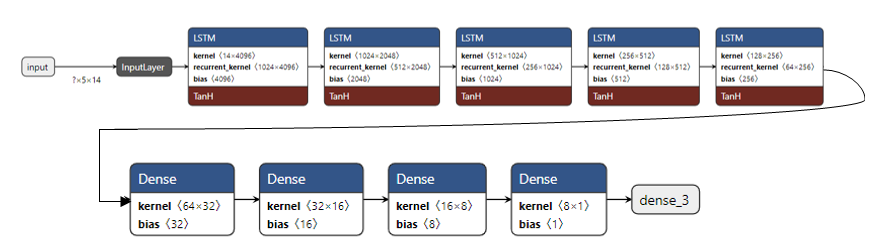

In [48]:
def make_generator_model(input_dim, output_dim, feature_size):
    model = tf.keras.Sequential([LSTM(units = 1024, return_sequences = True, 
                                    input_shape=(input_dim, feature_size),recurrent_dropout = 0.3),
                               LSTM(units = 512, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 256, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 128, return_sequences = True, recurrent_dropout = 0.3),
                               LSTM(units = 64, recurrent_dropout = 0.3),
                               Dense(32),
                               Dense(16),
                               Dense(8),
                               Dense(units=output_dim)])
    return model

Discriminator model sructure looks like this:

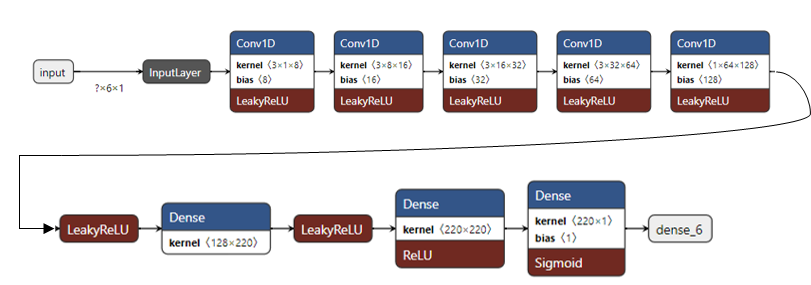

In [49]:
def make_discriminator_model(input_dim):
    cnn_net = tf.keras.Sequential()
    cnn_net.add(Conv1D(8, input_shape=(input_dim+1, 1), kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(16, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(32, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(64, kernel_size=3, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    cnn_net.add(Conv1D(128, kernel_size=1, strides=2, padding='same', activation=LeakyReLU(alpha=0.01)))
    #cnn_net.add(Flatten())
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False))
    cnn_net.add(LeakyReLU())
    cnn_net.add(Dense(220, use_bias=False, activation='relu'))
    cnn_net.add(Dense(1, activation='sigmoid'))
    return cnn_net

Now we define loss functions for our models. We will use BinaryCrossEntropy loss for both models:

In [50]:
def discriminator_loss(real_output, fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    real_loss = loss_f(tf.ones_like(real_output), real_output)
    fake_loss = loss_f(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    loss_f = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    loss = loss_f(tf.ones_like(fake_output), fake_output)
    return loss

In [51]:
dataset.iloc[:, 1:] = pd.concat([dataset.iloc[:, 1:].ffill()])

In [52]:
datetime_series = pd.to_datetime(dataset['Date'])
datetime_index = pd.DatetimeIndex(datetime_series.values)
dataset = dataset.set_index(datetime_index)
dataset = dataset.sort_values(by='Date')
dataset = dataset.drop(columns='Date')

In [53]:
def normalize_data(df, range, target_column):

    '''
    df: dataframe object
    range: type tuple -> (lower_bound, upper_bound)
        lower_bound: int
        upper_bound: int
    target_column: type str -> should reflect closing price of stock
    '''

    target_df_series = pd.DataFrame(df[target_column])
    data = pd.DataFrame(df.iloc[:, :])

    X_scaler = MinMaxScaler(feature_range=range)
    y_scaler = MinMaxScaler(feature_range=range)
    X_scaler.fit(data)
    y_scaler.fit(target_df_series)

    X_scale_dataset = X_scaler.fit_transform(data)
    y_scale_dataset = y_scaler.fit_transform(target_df_series)
    
    dump(X_scaler, open('X_scaler.pkl', 'wb'))
    dump(y_scaler, open('y_scaler.pkl', 'wb'))

    return (X_scale_dataset,y_scale_dataset)

In [54]:
def batch_data(x_data,y_data, batch_size, predict_period):
    X_batched, y_batched, yc = list(), list(), list()

    for i in range(0,len(x_data),1):
        x_value = x_data[i: i + batch_size][:, :]
        y_value = y_data[i + batch_size: i + batch_size + predict_period][:, 0]
        yc_value = y_data[i: i + batch_size][:, :]
        if len(x_value) == batch_size and len(y_value) == predict_period:
            X_batched.append(x_value)
            y_batched.append(y_value)
            yc.append(yc_value)

    return np.array(X_batched), np.array(y_batched), np.array(yc)

In [55]:
def split_train_test(data):
    train_size = len(data) - 20
    data_train = data[0:train_size]
    data_test = data[train_size:]
    return data_train, data_test

In [56]:
def predict_index(dataset, X_train, batch_size, prediction_period):

    # get the predict data (remove the in_steps days)
    train_predict_index = dataset.iloc[batch_size: X_train.shape[0] + batch_size + prediction_period, :].index
    test_predict_index = dataset.iloc[X_train.shape[0] + batch_size:, :].index

    return train_predict_index, test_predict_index

In [57]:
X_scale_dataset,y_scale_dataset = normalize_data(dataset, (-1,1), "Close")
X_batched, y_batched, yc = batch_data(X_scale_dataset, y_scale_dataset, batch_size = 5, predict_period = 1)
print("X shape:", X_batched.shape)
print("y shape:", y_batched.shape)
print("yc shape:", yc.shape)

X_train, X_test, = split_train_test(X_batched)
y_train, y_test, = split_train_test(y_batched)
yc_train, yc_test, = split_train_test(yc)
index_train, index_test, = predict_index(dataset, X_train, 5, 1)

X shape: (227, 5, 15)
y shape: (227, 1)
yc shape: (227, 5, 1)


In [58]:
input_dim = X_train.shape[1] 
feature_size = X_train.shape[2] 
output_dim = y_train.shape[1]

In [59]:
@tf.function

def train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(real_x, training=True)
        generated_data_reshape = tf.reshape(generated_data, [generated_data.shape[0], generated_data.shape[1], 1])
        d_fake_input = tf.concat([tf.cast(generated_data_reshape, tf.float64), yc], axis=1)
        real_y_reshape = tf.reshape(real_y, [real_y.shape[0], real_y.shape[1], 1])
        d_real_input = tf.concat([real_y_reshape, yc], axis=1)

        real_output = discriminator(d_real_input, training=True)
        fake_output = discriminator(d_fake_input, training=True)

        g_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(g_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    g_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    d_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return real_y, generated_data, {'d_loss': disc_loss, 'g_loss': g_loss}

In [60]:
def train(real_x, real_y, yc, Epochs, generator, discriminator, g_optimizer, d_optimizer, checkpoint = 50):
    train_info = {}
    train_info["discriminator_loss"] = []
    train_info["generator_loss"] = []

    for epoch in tqdm(range(Epochs)):
        real_price, fake_price, loss = train_step(real_x, real_y, yc, generator, discriminator, g_optimizer, d_optimizer)
        G_losses = []
        D_losses = []
        Real_price = []
        Predicted_price = []
        D_losses.append(loss['d_loss'].numpy())
        G_losses.append(loss['g_loss'].numpy())
        Predicted_price.append(fake_price.numpy())
        Real_price.append(real_price.numpy())

        #Save model every X checkpoints
        if (epoch + 1) % checkpoint == 0:
            tf.keras.models.save_model(generator, f'./models_gan/{stock_name}/generator_V_%d.h5' % epoch)
            tf.keras.models.save_model(discriminator, f'./models_gan/{stock_name}/discriminator_V_%d.h5' % epoch)
            print('epoch', epoch + 1, 'discriminator_loss', loss['d_loss'].numpy(), 'generator_loss', loss['g_loss'].numpy())
    
        train_info["discriminator_loss"].append(D_losses)
        train_info["generator_loss"].append(G_losses)
  
    Predicted_price = np.array(Predicted_price)
    Predicted_price = Predicted_price.reshape(Predicted_price.shape[1], Predicted_price.shape[2])
    Real_price = np.array(Real_price)
    Real_price = Real_price.reshape(Real_price.shape[1], Real_price.shape[2])

    plt.subplot(2,1,1)
    plt.plot(train_info["discriminator_loss"], label='Disc_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Discriminator Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.plot(train_info["generator_loss"], label='Gen_loss', color='#000000')
    plt.xlabel('Epoch')
    plt.ylabel('Generator Loss')
    plt.legend()

    plt.show()

    return Predicted_price, Real_price, np.sqrt(mean_squared_error(Real_price, Predicted_price)) / np.mean(Real_price)

In [61]:
def plot_results(Real_price, Predicted_price, index_train):
    X_scaler = load(open('/content/X_scaler.pkl', 'rb'))
    y_scaler = load(open('/content/y_scaler.pkl', 'rb'))
    train_predict_index = index_train

    rescaled_Real_price = y_scaler.inverse_transform(Real_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=train_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
  
    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=train_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)
  
    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"])
    plt.plot(predict_result["predicted_mean"], color = 'r')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title("The result of Training", fontsize=20)
    plt.show()

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('-- Train RMSE -- ', RMSE)

In [62]:
@tf.function 

def eval_op(generator, real_x):
    generated_data = generator(real_x, training = False)

    return generated_data

In [63]:
def plot_test_data(Real_test_price, Predicted_test_price, index_test):
    X_scaler = load(open('X_scaler.pkl', 'rb'))
    y_scaler = load(open('y_scaler.pkl', 'rb'))
    test_predict_index = index_test

    rescaled_Real_price = y_scaler.inverse_transform(Real_test_price)
    rescaled_Predicted_price = y_scaler.inverse_transform(Predicted_test_price)

    predict_result = pd.DataFrame()
    for i in range(rescaled_Predicted_price.shape[0]):
        y_predict = pd.DataFrame(rescaled_Predicted_price[i], columns=["predicted_price"], index=test_predict_index[i:i+output_dim])
        predict_result = pd.concat([predict_result, y_predict], axis=1, sort=False)
  
    real_price = pd.DataFrame()
    for i in range(rescaled_Real_price.shape[0]):
        y_train = pd.DataFrame(rescaled_Real_price[i], columns=["real_price"], index=test_predict_index[i:i+output_dim])
        real_price = pd.concat([real_price, y_train], axis=1, sort=False)
  
    predict_result['predicted_mean'] = predict_result.mean(axis=1)
    real_price['real_mean'] = real_price.mean(axis=1)

    predicted = predict_result["predicted_mean"]
    real = real_price["real_mean"]
    For_MSE = pd.concat([predicted, real], axis = 1)
    RMSE = np.sqrt(mean_squared_error(predicted, real))
    print('Test RMSE: ', RMSE)
    
    plt.figure(figsize=(16, 8))
    plt.plot(real_price["real_mean"], color='#00008B')
    plt.plot(predict_result["predicted_mean"], color = '#8B0000', linestyle='--')
    plt.xlabel("Date")
    plt.ylabel("Stock price")
    plt.legend(("Real price", "Predicted price"), loc="upper left", fontsize=16)
    plt.title(f"Prediction on test data for {stock_name}", fontsize=20)
    plt.show()

In [64]:
learning_rate = 5e-4
epochs = 500

g_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)
d_optimizer = tf.keras.optimizers.Adam(lr = learning_rate)

generator = make_generator_model(X_train.shape[1], output_dim, X_train.shape[2])
discriminator = make_discriminator_model(X_train.shape[1])

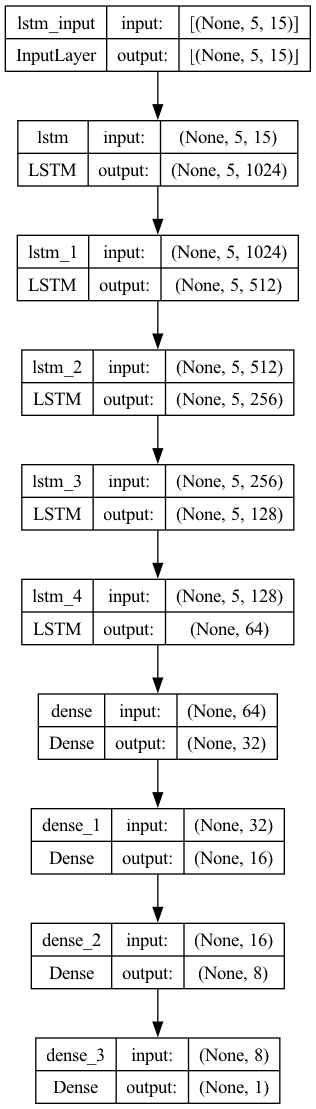

In [65]:
plot_model(generator, to_file='generator_keras_model.png', show_shapes=True)

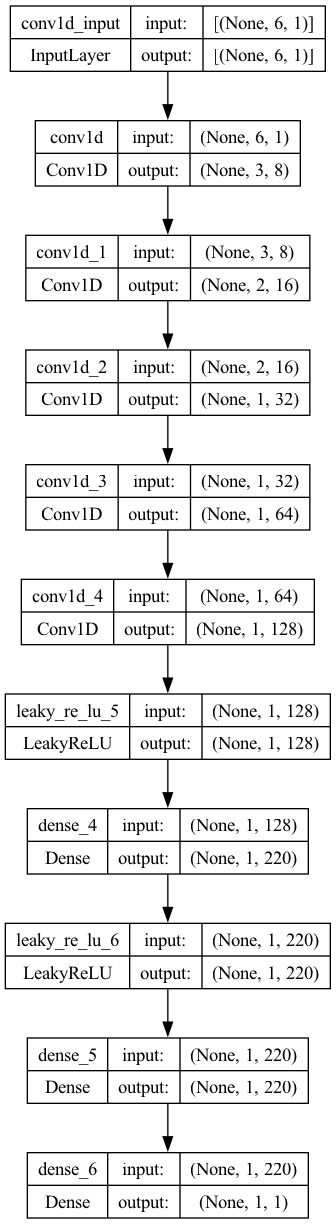

In [66]:
tf.keras.utils.plot_model(discriminator, to_file='discriminator_keras_model.png', show_shapes=True)

## Train and test model

Train model on train data and save model weights for every 50 epochs:

 10%|████                                      | 49/500 [00:21<02:16,  3.30it/s]

 10%|████▏                                     | 50/500 [00:22<02:29,  3.01it/s]

epoch 50 discriminator_loss 1.388584 generator_loss 0.68446034


 20%|████████▎                                 | 99/500 [00:35<01:45,  3.81it/s]

 20%|████████▏                                | 100/500 [00:35<01:58,  3.39it/s]

epoch 100 discriminator_loss 1.391655 generator_loss 0.7429246


 30%|████████████▏                            | 149/500 [00:49<01:34,  3.70it/s]

 30%|████████████▎                            | 150/500 [00:50<01:45,  3.31it/s]

epoch 150 discriminator_loss 1.3868165 generator_loss 0.69840235


 40%|████████████████▎                        | 199/500 [01:05<01:47,  2.81it/s]

 40%|████████████████▍                        | 200/500 [01:05<01:48,  2.76it/s]

epoch 200 discriminator_loss 1.3889709 generator_loss 0.6935341


 50%|████████████████████▍                    | 249/500 [01:22<01:38,  2.56it/s]

 50%|████████████████████▌                    | 250/500 [01:22<01:41,  2.47it/s]

epoch 250 discriminator_loss 1.3860073 generator_loss 0.6961395


 60%|████████████████████████▌                | 299/500 [01:38<00:57,  3.51it/s]

 60%|████████████████████████▌                | 300/500 [01:38<01:03,  3.13it/s]

epoch 300 discriminator_loss 1.3800633 generator_loss 0.68979746


 70%|████████████████████████████▌            | 349/500 [01:53<00:48,  3.11it/s]

 70%|████████████████████████████▋            | 350/500 [01:53<00:51,  2.93it/s]

epoch 350 discriminator_loss 1.3862934 generator_loss 0.6899826


 80%|████████████████████████████████▋        | 399/500 [02:08<00:35,  2.83it/s]

 80%|████████████████████████████████▊        | 400/500 [02:08<00:36,  2.71it/s]

epoch 400 discriminator_loss 1.3864686 generator_loss 0.6956218


 90%|████████████████████████████████████▊    | 449/500 [02:23<00:14,  3.48it/s]

 90%|████████████████████████████████████▉    | 450/500 [02:24<00:15,  3.15it/s]

epoch 450 discriminator_loss 1.3859615 generator_loss 0.69329184


100%|████████████████████████████████████████▉| 499/500 [02:38<00:00,  3.52it/s]

100%|█████████████████████████████████████████| 500/500 [02:38<00:00,  3.15it/s]

epoch 500 discriminator_loss 1.3882909 generator_loss 0.69007957


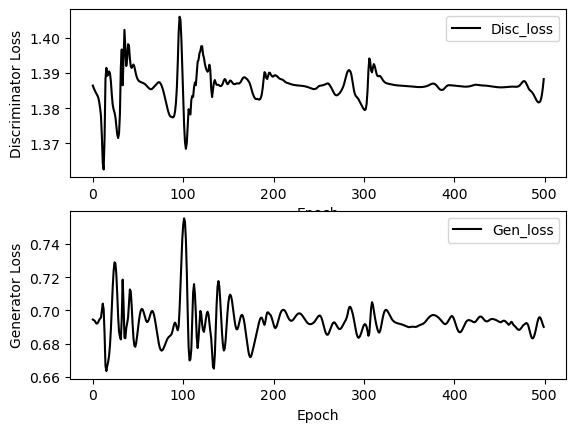

In [67]:
predicted_price, real_price, RMSPE = train(X_train, y_train, yc_train, epochs, generator, discriminator, g_optimizer, d_optimizer)

In [68]:
test_generator = tf.keras.models.load_model(f'./models_gan/{stock_name}/generator_V_{epochs-1}.h5')

Predict and plot results for test data:

Test RMSE:  23.905442084382365


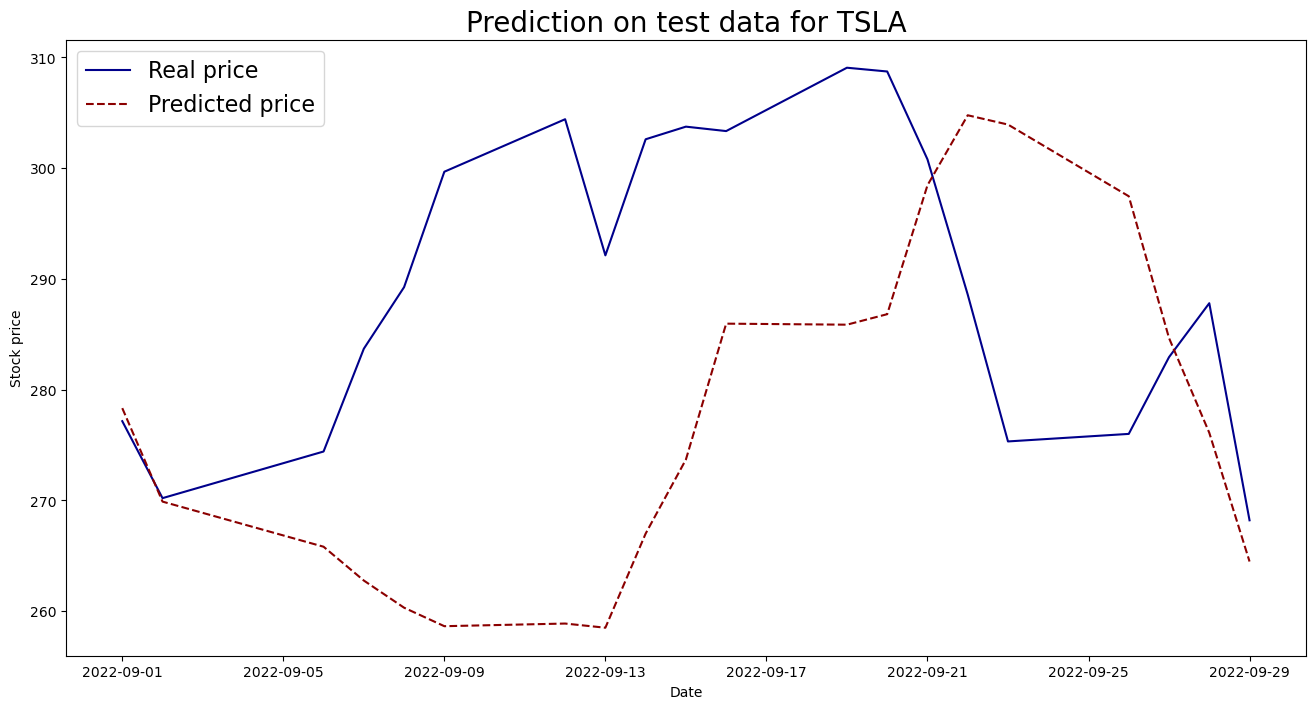

In [69]:
predicted_test_data = eval_op(test_generator, X_test)
plot_test_data(y_test, predicted_test_data,index_test)

## Conclusion

As we can see, GAN models can perform quite well with time series and even stock data. Moreover, using raw historical data gives quite poor predictions, but when we add technical indicators and Twitter sentiment analysis it becomes much easier for the model to make predictions.

This might not work for "less popular" stock tickers as the number of tweets about such stocks gets drastically lower than, for example, Tesla. In this case sentiment scores might fail to give the bigger picture and might even decrease model results.